<a href="https://colab.research.google.com/github/Devesh-DevCodes/NewsClassification/blob/main/NewsClassification1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

In [2]:
# Import libraries
import pandas as pd
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [20]:
# Preprocessing and EDA
# Load dataset from HuggingFace
dataset = load_dataset("ag_news")

# Convert to DataFrame
df = pd.DataFrame(dataset['train'])
print(df.head())

                                                text  label
0  Wall St. Bears Claw Back Into the Black (Reute...      2
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3  Iraq Halts Oil Exports from Main Southern Pipe...      2
4  Oil prices soar to all-time record, posing new...      2


In [21]:
import re

# Map label numbers to label names
label_mapping = {0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}
df['label_text'] = df['label'].map(label_mapping)

print(label_mapping)

{0: 'World', 1: 'Sports', 2: 'Business', 3: 'Sci/Tech'}


In [6]:
# Check missing
print(df.isnull().sum())

# Drop missing rows
df.dropna(inplace=True)

# Drop duplicates
df.drop_duplicates(subset='text', inplace=True)


text          0
label         0
label_text    0
dtype: int64


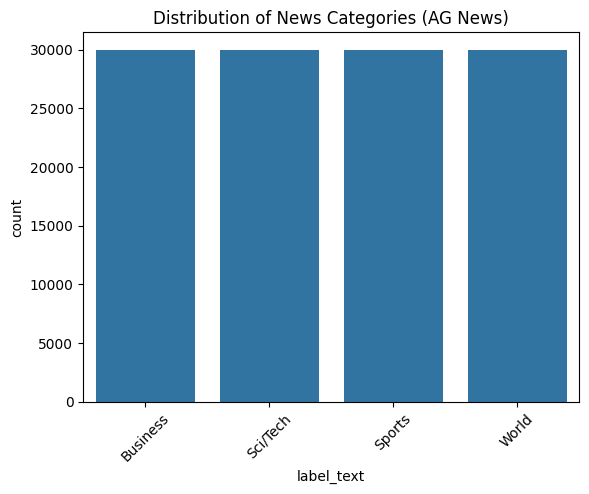

label_text
Business    30000
Sci/Tech    30000
Sports      30000
World       30000
Name: count, dtype: int64


In [8]:
sns.countplot(data=df, x='label_text')
plt.title("Distribution of News Categories (AG News)")
plt.xticks(rotation=45)
plt.show()

print(df['label_text'].value_counts())


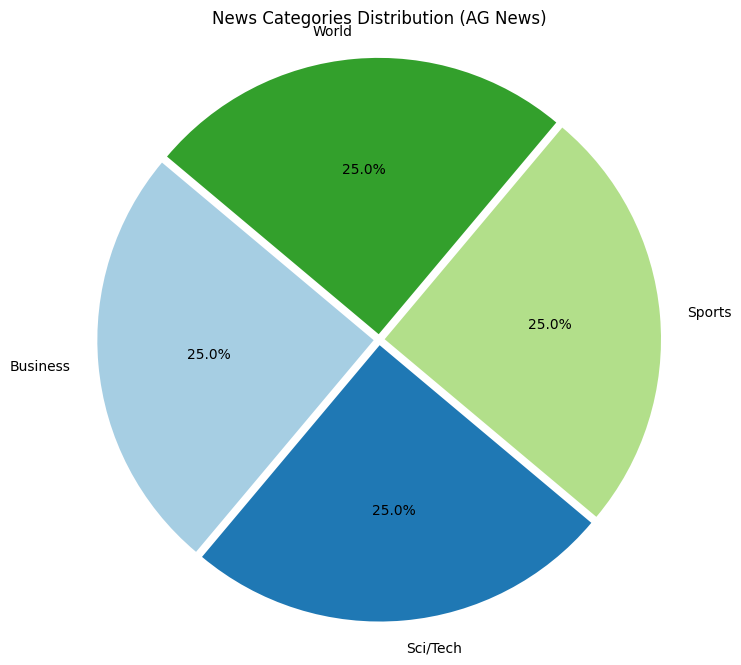


Category Percentage Distribution:
label_text
Business    25.0
Sci/Tech    25.0
Sports      25.0
World       25.0
Name: count, dtype: float64


In [9]:
import matplotlib.pyplot as plt

# Count samples for each category
category_counts = df['label_text'].value_counts()

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.02]*len(category_counts),   # small pop-out effect
    colors=plt.cm.Paired.colors             # colorful palette
)
plt.title('News Categories Distribution (AG News)')
plt.axis('equal')   # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Optional: print percentages
print("\nCategory Percentage Distribution:")
print((category_counts / category_counts.sum()) * 100)


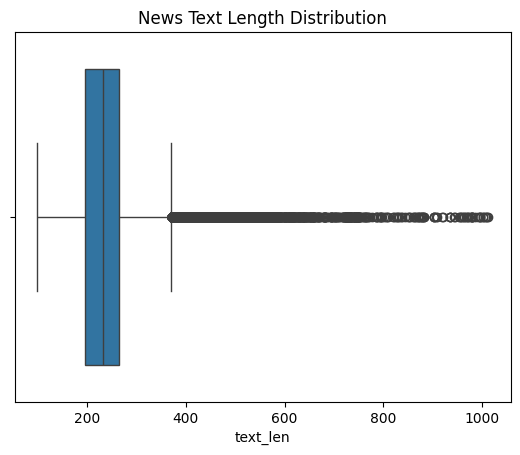

In [10]:
df['text_len'] = df['text'].apply(len)

sns.boxplot(x=df['text_len'])
plt.title("News Text Length Distribution")
plt.show()


In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()

df['clean_text'] = df['text'].apply(clean_text)


In [12]:
X = df['clean_text']
y = df['label']


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      5956
           1       0.95      0.97      0.96      6058
           2       0.87      0.88      0.87      5911
           3       0.89      0.88      0.88      6075

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



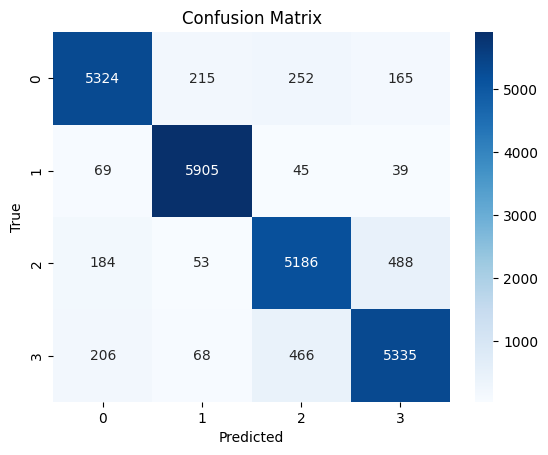

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [18]:
def predict_category(news_text):
    # Step 1: Clean the input text
    clean_news = clean_text(news_text)

    # Step 2: Vectorize it
    news_vec = vectorizer.transform([clean_news])

    # Step 3: Predict using your trained model
    pred_label = model.predict(news_vec)[0]

    # Step 4: Map label to actual category name
    category = label_mapping[pred_label]

    return category





In [19]:
# Example usage:
news_input = input("Enter your news text: ")
predicted_category = predict_category(news_input)

print(f"\nPredicted News Category: {predicted_category}")

Enter your news text: india won cricket match

Predicted News Category: Sports
